In [14]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/oil_futures_front.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2014-02-18,100.51,100.51,100.51,100.51,0.96,100.51,25.0,12833.0
2014-02-19,100.83,100.83,100.83,100.83,0.32,100.83,0.0,12833.0
2014-02-20,100.78,100.78,100.78,100.78,0.05,100.78,15.0,12833.0
2014-02-21,100.61,100.61,100.61,100.61,0.17,100.61,0.0,12833.0
2014-02-24,100.77,100.77,100.77,100.77,0.16,100.77,6.0,12833.0


<AxesSubplot:xlabel='Date'>

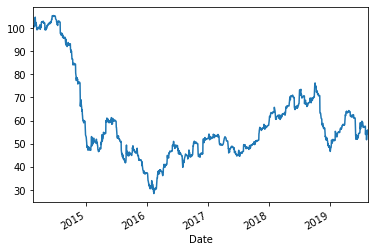

In [3]:
# Plot settle data
df.Settle.plot()

<AxesSubplot:xlabel='Date'>

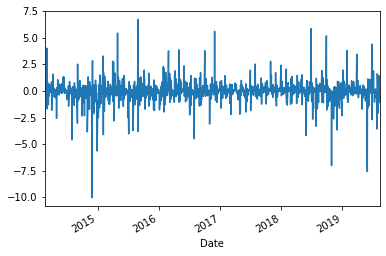

In [4]:
# Differencing the Settle price stationarizes the time series
df.Settle.diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

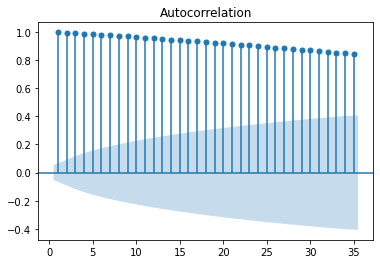

In [5]:
# Plot the autocorrelation of the Settle Prices
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df.Settle, zero=False, lags=35);

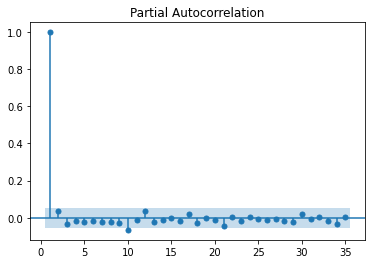

In [6]:
# Plot the partial autocorrelation of the returns
plot_pacf(df.Settle, zero=False, lags=35);

# ARIMA Model

In [7]:
# Create an ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df.Settle.values, order=(1, 1, 1))

/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [8]:
# Fit the model to the data
results = model.fit()

In [9]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1380
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1945.880
Method:                       css-mle   S.D. of innovations              0.991
Date:                Sun, 18 Apr 2021   AIC                           3899.760
Time:                        20:32:18   BIC                           3920.680
Sample:                             1   HQIC                          3907.586
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0334      0.025     -1.328      0.184      -0.083       0.016
ar.L1.D.y     -0.4478      0.205     -2.186      0.029      -0.849      -0.046
ma.L1.D.y      0.3661      0.213      1.721      0.085      -0.051       0.783
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.2332           +0.0000j            2.2332            0.5000
MA.1           -2.7312           +0.0000j            2.7312            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

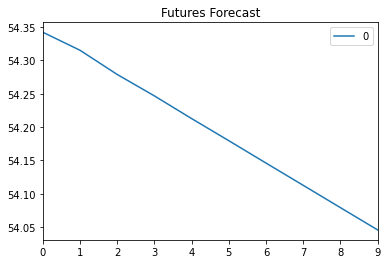

In [10]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

# ARIMA Model using a Lag of 2

In [11]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df.Settle.values, order=(2, 1, 1))
results2 = model2.fit()

/Users/kumarisurbhi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
# Print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1380
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1939.200
Method:                       css-mle   S.D. of innovations              0.986
Date:                Sun, 18 Apr 2021   AIC                           3888.401
Time:                        20:32:18   BIC                           3914.550
Sample:                             1   HQIC                          3898.183
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0334      0.041     -0.821      0.412      -0.113       0.046
ar.L1.D.y      0.8282      0.046     18.193      0.000       0.739       0.917
ar.L2.D.y      0.1168      0.027      4.270      0.000       0.063       0.170
ma.L1.D.y     -0.9154      0.038    -24.075      0.000      -0.990      -0.841
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0514           +0.0000j            1.0514            0.0000
AR.2           -8.1406           +0.0000j            8.1406            0.5000
MA.1            1.0924           +0.0000j            1.0924            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

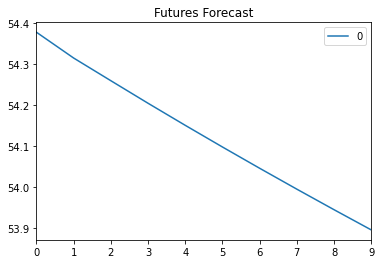

In [13]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")